In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from collections import Counter
from sklearn.metrics import plot_precision_recall_curve

In [3]:
myData=pd.read_csv('imputedData.csv')
myData.head()

#One hot encoding of categorical variables

#Create list with features to be dummified cols.
nonum_feats_names = ['Month','OperatingSystems','Browser','Region','VisitorType','Weekend']


dataModel = pd.concat([myData[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']],
                       pd.get_dummies(myData[nonum_feats_names].astype('category')),myData['Revenue']],axis=1)
                      
dataModel.info()


#Label Encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Revenue'] = le.fit_transform(myData['Revenue'])
myData['Revenue'].value_counts()

myData['Revenue'].head()

# getting dependent and independent variables

x = dataModel
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   TrafficType                    12330 non-null  int64  
 10  SpecialDay                     12330 non-null  float64
 11  Month_Aug                      12330 non-null  uint8  
 12  Month_Dec                      12330 non-null 

In [4]:
# splitting the data

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.3, random_state = 42,shuffle=True,stratify=y)

# checking the shapes

print("Shape of x_train :", X_Train.shape)
print("Shape of y_train :", y_Train.shape)
print("Shape of x_test :", X_Test.shape)
print("Shape of y_test :", y_Test.shape)

Shape of x_train : (8631, 56)
Shape of y_train : (8631,)
Shape of x_test : (3699, 56)
Shape of y_test : (3699,)


In [5]:
print(pd.DataFrame(y_Train,columns=['Revenue']).Revenue.value_counts(normalize=True))
print(Counter(y_Train))

0    0.845209
1    0.154791
Name: Revenue, dtype: float64
Counter({0: 7295, 1: 1336})


In [6]:
#SCALING WITH STANDARD Z SCORE SCALER
#Scaling the data first fitting it and transforming the training set
#to later apply the fit to transform the test set.
from sklearn.preprocessing import StandardScaler

num_cols_names = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']
#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_Train[num_cols_names]), 
                                     columns=num_cols_names, index= X_Train.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    X_Train[col] = scaled_numfeats_train[col]
    
    
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_Test[num_cols_names]),
                                    columns=num_cols_names, index= X_Test.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    X_Test[col] = scaled_numfeats_test[col]

C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
X_Train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType,...,Region_5,Region_6,Region_7,Region_8,Region_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
7460,0.508002,-0.200488,-0.3947,-0.244336,-0.399509,-0.483009,-0.454346,-0.668356,-0.320111,0.223142,...,0,0,0,0,0,1,0,0,1,0
4687,-0.397089,-0.229562,-0.3947,-0.244336,-0.283724,-0.388159,-0.454346,-0.668356,-0.320111,-0.023995,...,0,0,0,0,0,0,0,1,1,0
790,-0.698787,-0.456792,-0.3947,-0.244336,-0.422666,-0.538272,-0.454346,-0.251598,-0.320111,-0.271132,...,0,0,0,0,0,0,0,1,1,0
9057,1.111396,-0.102539,-0.3947,-0.244336,0.341513,-0.040404,-0.308034,-0.544755,-0.320111,0.964551,...,0,0,0,0,0,0,0,1,1,0
225,-0.698787,-0.456792,-0.3947,-0.244336,-0.677393,-0.669486,-0.454346,1.173716,-0.320111,1.705961,...,0,0,0,0,0,0,0,1,0,1


In [8]:
X_Train.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                 axis=1, inplace=True)
X_Test.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                axis=1, inplace=True)

C:\Users\neera\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
X_Train = X_Train.drop(['Weekend_True','Region_2','Region_1','Month_Jul','Month_Feb','Informational','Browser_9','Browser_12',
                        'Browser_11','Region_8','Region_3','OperatingSystems_6','OperatingSystems_1','Month_June',
                        'Browser_8','Browser_7','Browser_3','Browser_13','Browser_10','VisitorType_Other','Region_8','Region_7',
                        'Region_5','OperatingSystems_5','Month_Aug'],axis=1)
X_Test = X_Test.drop(['Weekend_True','Region_2','Region_1','Month_Jul','Month_Feb','Informational','Browser_9','Browser_12',
                        'Browser_11','Region_8','Region_3','OperatingSystems_6','OperatingSystems_1','Month_June',
                        'Browser_8','Browser_7','Browser_3','Browser_13','Browser_10','VisitorType_Other','Region_8','Region_7',
                        'Region_5','OperatingSystems_5','Month_Aug'],axis=1)

In [10]:
X_Train = X_Train.drop(['OperatingSystems_4','OperatingSystems_7','OperatingSystems_8','Browser_5','Region_9'],axis=1)
X_Test = X_Test.drop(['OperatingSystems_4','OperatingSystems_7','OperatingSystems_8','Browser_5','Region_9'],axis=1)

print(X_Train.shape, X_Test.shape)

(8631, 23) (3699, 23)


# Oversampling and Undersampling using SMOTEEN

In [11]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

sm=SMOTEENN(random_state=33,sampling_strategy=0.35,enn=EditedNearestNeighbours(sampling_strategy='majority'))
sm
X_Train_res, y_Train_res = sm.fit_resample(X_Train, y_Train)

C:\Users\neera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\neera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\neera\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [12]:
print(pd.DataFrame(y_Train_res,columns=['Revenue']).Revenue.value_counts(normalize=True))
print(Counter(y_Train_res))

0    0.692373
1    0.307627
Name: Revenue, dtype: float64
Counter({0: 5746, 1: 2553})


In [13]:
print("Shape of x_train :", X_Train_res.shape) 
print("Shape of y_train :", y_Train_res.shape)

Shape of x_train : (8299, 23)
Shape of y_train : (8299,)


# Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training Accuracy : 0.9090251837570792
Testing Accuracy : 0.8742903487429035
ROC AUC Score : 0.8149422132073236
*******************************************************************************************
CONFUSION MATRIX


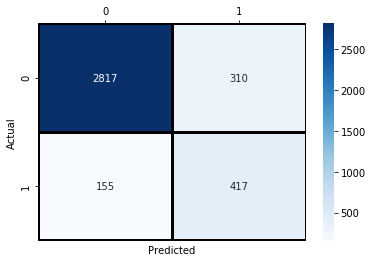

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.73      0.64       572

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


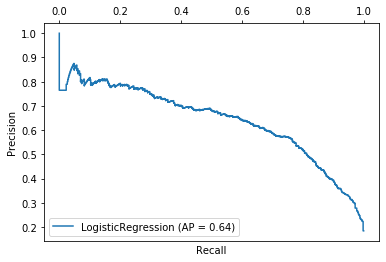

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9081805630241109
Standard Deviation : 0.0081642837477491
Mean precision score : 0.9262753546095782
Standard Deviation precision score : 0.014526652244606919
Mean recall score : 0.7622150735294118
Standard Deviation recall score : 0.019963550315585235
Mean f1 score : 0.8361576115250878
Standard Deviation f1 score : 0.015681159295256705
Mean AUC ROC Score : 0.8676203378554497
Standard Deviation AUC ROC Score : 0.011194694811019935
*******************************************************************************************


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
classifier_lg = LogisticRegression() 
classifier_lg.fit(X_Train_res,y_Train_res)
print(classifier_lg)

y_pred=classifier_lg.predict(X_Test)
warnings.filterwarnings("default")

# evaluating the model
from sklearn.metrics import roc_auc_score
print("Training Accuracy :", classifier_lg.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_lg.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

from sklearn.metrics import classification_report,confusion_matrix
print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_lg, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate


# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_lg, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring, n_jobs=-1)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Logistic Regression Hyper-parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

base_classifier = LogisticRegression(penalty='l2')
params = [
    {
     'C' : [0.1, 0.01,1],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 1],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
*****************************************************************

# Logistic Regression Hyper parameter tuned model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Training Accuracy : 0.9090251837570792
Testing Accuracy : 0.8742903487429035
ROC AUC Score : 0.8149422132073236
*******************************************************************************************
CONFUSION MATRIX


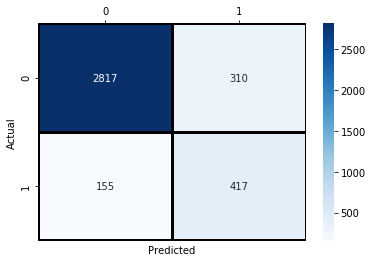

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.73      0.64       572

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


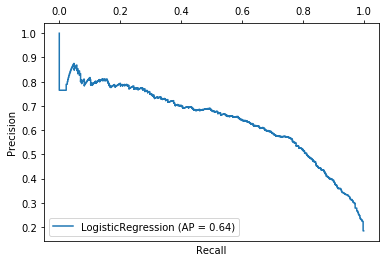

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9081805630241109
Standard Deviation : 0.0081642837477491
Mean precision score : 0.9262753546095782
Standard Deviation precision score : 0.014526652244606919
Mean recall score : 0.7622150735294118
Standard Deviation recall score : 0.019963550315585235
Mean f1 score : 0.8361576115250878
Standard Deviation f1 score : 0.015681159295256705
Mean AUC ROC Score : 0.8676203378554497
Standard Deviation AUC ROC Score : 0.011194694811019935
*******************************************************************************************


In [45]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(C=1,solver='newton-cg') 
classifier_lg.fit(X_Train_res,y_Train_res)
print(classifier_lg)

y_pred=classifier_lg.predict(X_Test)

# evaluating the model
from sklearn.metrics import roc_auc_score
print("Training Accuracy :", classifier_lg.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_lg.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

from sklearn.metrics import classification_report,confusion_matrix
print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_lg, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate


# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_lg, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring, n_jobs=-1)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)
Training Accuracy : 0.8670924207735872
Testing Accuracy : 0.7772370911057043
ROC AUC Score : 0.7968215027696959
*******************************************************************************************
CONFUSION MATRIX


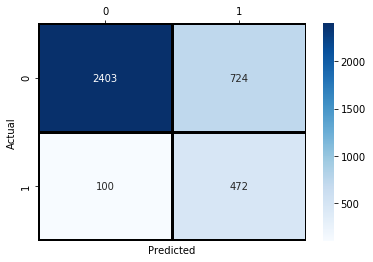

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      3127
           1       0.39      0.83      0.53       572

    accuracy                           0.78      3699
   macro avg       0.68      0.80      0.69      3699
weighted avg       0.87      0.78      0.80      3699

*******************************************************************************************
PRECISION RECALL CURVE


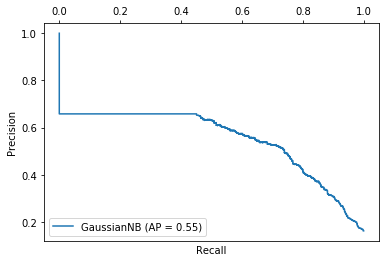

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.8662490734954291
Standard Deviation : 0.007001964201888699
Mean precision score : 0.753404057235987
Standard Deviation precision score : 0.019108603248307772
Mean recall score : 0.8417601102941177
Standard Deviation recall score : 0.014722779702665957
Mean f1 score : 0.7948321056368766
Standard Deviation f1 score : 0.008002570988539156
Mean AUC ROC Score : 0.8594475449213356
Standard Deviation AUC ROC Score : 0.0052501700584977416
*******************************************************************************************


In [47]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB() 
classifier_nb.fit(X_Train_res,y_Train_res)
print(classifier_nb)

y_pred=classifier_nb.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_nb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_nb.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_nb, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_nb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Training Accuracy : 0.9678274490902519
Testing Accuracy : 0.7985942146526088
ROC AUC Score : 0.7508867052359216
*******************************************************************************************
CONFUSION MATRIX
CONFUSION MATRIX


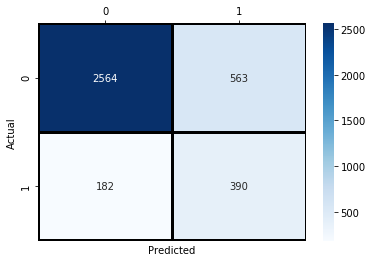

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3127
           1       0.41      0.68      0.51       572

    accuracy                           0.80      3699
   macro avg       0.67      0.75      0.69      3699
weighted avg       0.85      0.80      0.82      3699

*******************************************************************************************
PRECISION RECALL CURVE


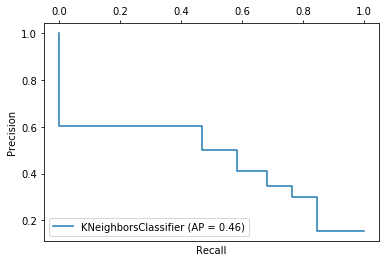

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9324025171857514
Standard Deviation : 0.018311920607143407
Mean precision score : 0.9289941341805731
Standard Deviation precision score : 0.016987392031643515
Mean recall score : 0.8444163602941177
Standard Deviation recall score : 0.052805490027483255
Mean f1 score : 0.884046773045281
Standard Deviation f1 score : 0.033908626691726305
Mean AUC ROC Score : 0.9079380695577542
Standard Deviation AUC ROC Score : 0.02775071127178787
*******************************************************************************************


In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier() 
classifier_knn.fit(X_Train_res,y_Train_res)
print(classifier_knn)

y_pred=classifier_knn.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_knn.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_knn.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_knn, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_knn, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# KNN Hyper-parameter tuning

In [49]:
base_classifier = KNeighborsClassifier()
params = [
    {
     'n_neighbors':[5,8,10,15],
        'leaf_size':[30,35,40],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree','kd_tree','brute']
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [30, 35, 40],
                          'n_neighbors': [5, 8, 10, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
*******************************************************************************************
Best Hyper Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors

# KNN Hyper-parameter tuned model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
Training Accuracy : 1.0
Testing Accuracy : 0.7958907812922411
ROC AUC Score : 0.7514304132068763
*******************************************************************************************
CONFUSION MATRIX


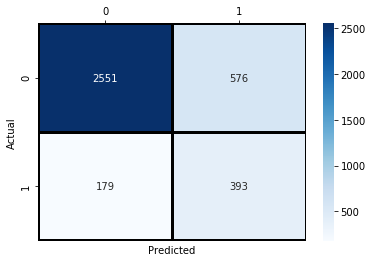

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3127
           1       0.41      0.69      0.51       572

    accuracy                           0.80      3699
   macro avg       0.67      0.75      0.69      3699
weighted avg       0.85      0.80      0.82      3699

*******************************************************************************************
PRECISION RECALL CURVE


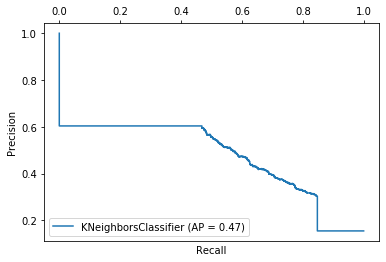

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9546954524975657
Standard Deviation : 0.01879514426965914
Mean precision score : 0.941998270324112
Standard Deviation precision score : 0.015414912931459484
Mean recall score : 0.9082720588235293
Standard Deviation recall score : 0.054185527042518514
Mean f1 score : 0.9242071702468729
Standard Deviation f1 score : 0.03311584442999479
Mean AUC ROC Score : 0.9417803257305042
Standard Deviation AUC ROC Score : 0.028490269534295568
*******************************************************************************************


In [50]:
classifier_knn = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance') 
classifier_knn.fit(X_Train_res,y_Train_res)
print(classifier_knn)

y_pred=classifier_knn.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_knn.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_knn.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_knn, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")


# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_knn, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Support Vector Machine

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Training Accuracy : 0.9252922038799856
Testing Accuracy : 0.8705055420383887
ROC AUC Score : 0.810560961264511
*******************************************************************************************
CONFUSION MATRIX


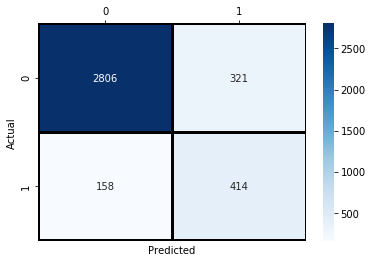

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.56      0.72      0.63       572

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


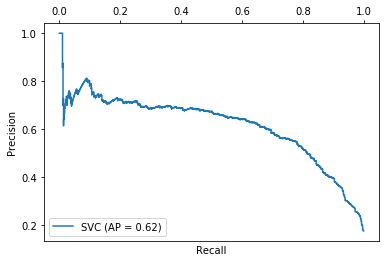

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9183038062987776
Standard Deviation : 0.008322558523002807
Mean precision score : 0.926812874441844
Standard Deviation precision score : 0.01682978470099188
Mean recall score : 0.797469362745098
Standard Deviation recall score : 0.016339695381785
Mean f1 score : 0.857223609617531
Standard Deviation f1 score : 0.014830197169602162
Mean AUC ROC Score : 0.8847255918406598
Standard Deviation AUC ROC Score : 0.010295184457034052
*******************************************************************************************


In [51]:
from sklearn.svm import SVC
classifier_svc = SVC() 
classifier_svc.fit(X_Train_res,y_Train_res)
print(classifier_svc)

y_pred=classifier_svc.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_svc.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_svc.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_svc, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_svc, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Support Vector Machine hyper-parameter tuning

In [52]:
base_classifier = SVC()
params = [
    {
     'C': [0.1,1,5,7,8,9,10, 100, 1000],
        'gamma': [1,0.1,0.01,0.002,0.0005,0.001,0.0001],
        'kernel': ['rbf']
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 7, 8, 9, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.002, 0.0005, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
*******************************************************************************************
Best Hyper Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy Score: 0.9614444751260771
Best Estimators: SV

# Support Vector Machine hyper-parameter tuned model

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Training Accuracy : 0.9997590071092902
Testing Accuracy : 0.8340091916734252
ROC AUC Score : 0.7204088683941576
*******************************************************************************************
CONFUSION MATRIX


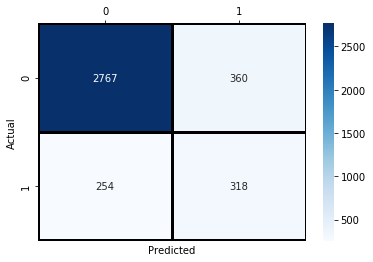

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3127
           1       0.47      0.56      0.51       572

    accuracy                           0.83      3699
   macro avg       0.69      0.72      0.70      3699
weighted avg       0.85      0.83      0.84      3699

*******************************************************************************************
PRECISION RECALL CURVE


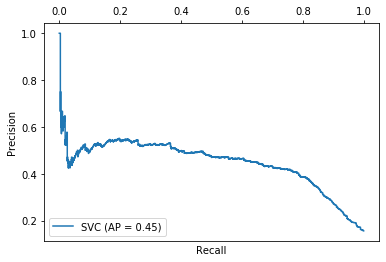

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9614444751260771
Standard Deviation : 0.026630323853240517
Mean precision score : 0.969569232897376
Standard Deviation precision score : 0.010405055131328014
Mean recall score : 0.9023606004901961
Standard Deviation recall score : 0.08250006702750098
Mean f1 score : 0.9330827128340051
Standard Deviation f1 score : 0.04772788647522323
Mean AUC ROC Score : 0.9450024484044679
Standard Deviation AUC ROC Score : 0.042142002721755396
*******************************************************************************************


In [53]:
from sklearn.svm import SVC
classifier_svc = SVC(C=100,gamma=1,kernel='rbf') 
classifier_svc.fit(X_Train_res,y_Train_res)
print(classifier_svc)

y_pred=classifier_svc.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_svc.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_svc.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_svc, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_svc, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# AdaBoost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Training Accuracy : 0.9237257500903724
Testing Accuracy : 0.8799675587996756
ROC AUC Score : 0.8211569770172265
*******************************************************************************************
CONFUSION MATRIX


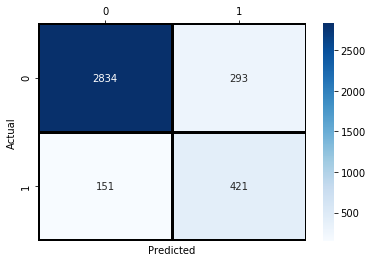

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3127
           1       0.59      0.74      0.65       572

    accuracy                           0.88      3699
   macro avg       0.77      0.82      0.79      3699
weighted avg       0.89      0.88      0.89      3699

*******************************************************************************************
PRECISION RECALL CURVE


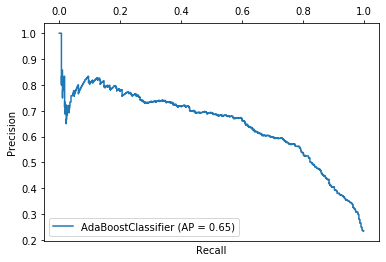

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9204742250061766
Standard Deviation : 0.02239260083945641
Mean precision score : 0.9157008241975593
Standard Deviation precision score : 0.0229410371889912
Mean recall score : 0.8158241421568627
Standard Deviation recall score : 0.06132877537339696
Mean f1 score : 0.8621150638405901
Standard Deviation f1 score : 0.04230630514089487
Mean AUC ROC Score : 0.8913803334629187
Standard Deviation AUC ROC Score : 0.033076406450873355
*******************************************************************************************


In [54]:
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

classifier_adb = AdaBoostClassifier() 
classifier_adb.fit(X_Train_res,y_Train_res)
print(classifier_adb)

y_pred=classifier_adb.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_adb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_adb.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_adb, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_adb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# AdaBoost Hyper-parameter tuning

In [55]:
base_classifier = AdaBoostClassifier()
params = [
    {
     'n_estimators': [50,100,200,500],
          'learning_rate': [1,0.1,0.01,0.001],
          'base_estimator':[DecisionTreeClassifier(max_depth=1)]
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                    class_weight=None,
                                                                    criterion='gini',
                                                                    max_depth=1,
                                                                    max_features=None,
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                               

# AdaBoost Hyper-parameter tuned model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

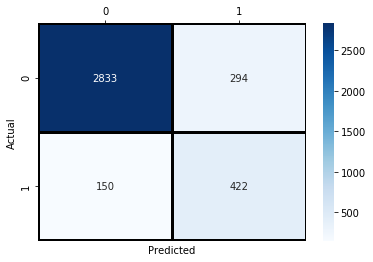

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3127
           1       0.59      0.74      0.66       572

    accuracy                           0.88      3699
   macro avg       0.77      0.82      0.79      3699
weighted avg       0.89      0.88      0.89      3699

*******************************************************************************************
PRECISION RECALL CURVE


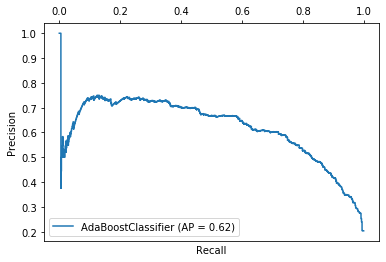

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.927945993866903
Standard Deviation : 0.03176176780285735
Mean precision score : 0.9175665279200377
Standard Deviation precision score : 0.02572816489800013
Mean recall score : 0.8400658700980392
Standard Deviation recall score : 0.09447943353021197
Mean f1 score : 0.8749883723365575
Standard Deviation f1 score : 0.05946759187310221
Mean AUC ROC Score : 0.9035013489257049
Standard Deviation AUC ROC Score : 0.04899254828451297
*******************************************************************************************


In [56]:
classifier_adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),learning_rate=1, n_estimators=500) 
classifier_adb.fit(X_Train_res,y_Train_res)
print(classifier_adb)

y_pred=classifier_adb.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_adb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_adb.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_adb, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")



# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_adb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Gradient Boosting

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training Accuracy : 0.9449331244728281
Testing Accuracy : 0.8761827520951608
ROC AUC Score : 0.8324887456643133
*******************************************************************************************
CONFUSION MATRIX


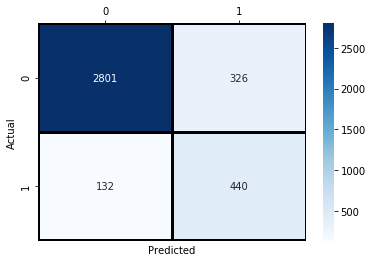

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.77      0.66       572

    accuracy                           0.88      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.90      0.88      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


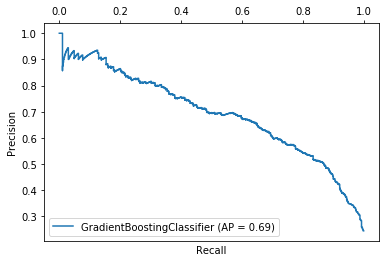

*******************************************************************************************
CROSS VALIDATION METRICS
Mean Accuracy : 0.9345724998909993
Standard Deviation : 0.02141300500161862
Mean precision score : 0.9179126620475854
Standard Deviation precision score : 0.023000902009491998
Mean recall score : 0.8643995098039217
Standard Deviation recall score : 0.06256448556279467
Mean f1 score : 0.8893840632565595
Standard Deviation f1 score : 0.039062923107824575
Mean AUC ROC Score : 0.9150573522356982
Standard Deviation AUC ROC Score : 0.032476236999116254
*******************************************************************************************


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier() 
classifier_gb.fit(X_Train_res,y_Train_res)
print(classifier_gb)

y_pred=classifier_gb.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_gb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_gb.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_gb, X_Test, y_Test)
plt.show()
print("*******************************************************************************************")

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_gb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Gradient Boosting Hyper-parameter tuning

In [58]:
base_classifier = GradientBoostingClassifier()
params = [
    {
    'n_estimators': [100,150,200,500],
          'learning_rate': [1,0.1,0.01,0.001],
        'max_depth': [1, 3, 5]
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

# Gradient Boosting Hyper-parameter tuned model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training Accuracy : 0.9985540426557417
Testing Accuracy : 0.8737496620708299
ROC AUC Score : 0.8289069820489712
*******************************************************************************************
CONFUSION MATRIX


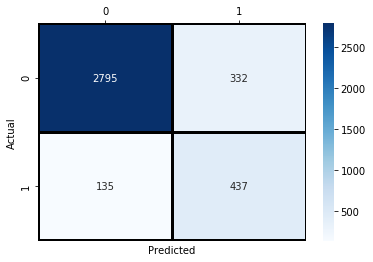

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.57      0.76      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


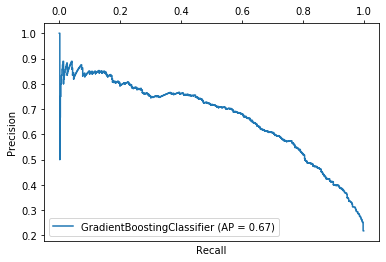

CROSS VALIDATION METRICS
Mean Accuracy : 0.9397542401209179
Standard Deviation : 0.02633198059307131
Mean precision score : 0.9150449462369463
Standard Deviation precision score : 0.021412404316068726
Mean recall score : 0.8859145220588236
Standard Deviation recall score : 0.08119188402857638
Mean f1 score : 0.8986411838514774
Standard Deviation f1 score : 0.047582915304086496
Mean AUC ROC Score : 0.9247703196568924
Standard Deviation AUC ROC Score : 0.041311258273904534
*******************************************************************************************


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500,max_depth=5) 
classifier_gb.fit(X_Train_res,y_Train_res)
print(classifier_gb)

y_pred=classifier_gb.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_gb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_gb.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_gb, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_gb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Bagging Tree

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

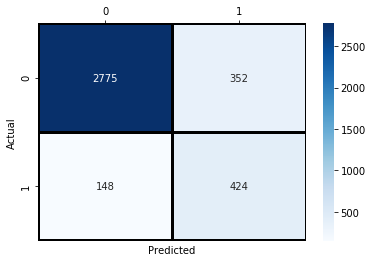

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.55      0.74      0.63       572

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.86      0.87      3699

*******************************************************************************************
PRECISION RECALL CURVE


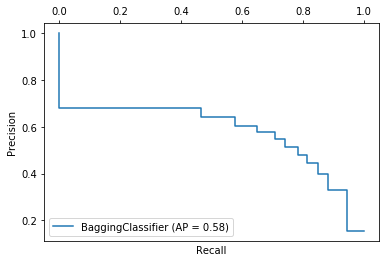

CROSS VALIDATION METRICS
Mean Accuracy : 0.9350532649294404
Standard Deviation : 0.01935308740821124
Mean precision score : 0.9127790190029714
Standard Deviation precision score : 0.020372711368346008
Mean recall score : 0.8722303921568628
Standard Deviation recall score : 0.06009722806327427
Mean f1 score : 0.8910488659580527
Standard Deviation f1 score : 0.03527621432100409
Mean AUC ROC Score : 0.9175801256345592
Standard Deviation AUC ROC Score : 0.03028677447836261
*******************************************************************************************


In [60]:
from sklearn import tree
classifier_bagt = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1)) 
classifier_bagt.fit(X_Train_res,y_Train_res)
print(classifier_bagt)

y_pred=classifier_bagt.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_bagt.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_bagt.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_bagt, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_bagt, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Bagging Tree hyper-parameter tuning

In [61]:
base_classifier = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
params = [
    {
    'n_estimators': [10,20,50],
        'max_features': [10,15,23],
        'max_samples':[10,15,20]
        
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                        

# Bagging Tree hyper-parameter tuned model

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

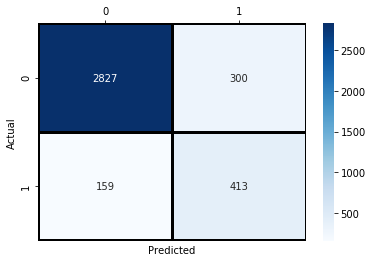

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.58      0.72      0.64       572

    accuracy                           0.88      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.88      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


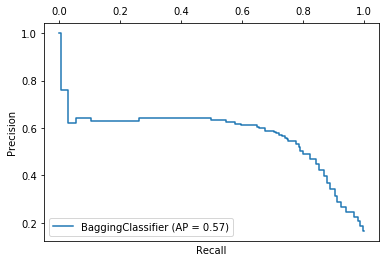

CROSS VALIDATION METRICS
Mean Accuracy : 0.9075784440536573
Standard Deviation : 0.008846666418567796
Mean precision score : 0.9064111438602203
Standard Deviation precision score : 0.022956835274487594
Mean recall score : 0.781000306372549
Standard Deviation recall score : 0.02946588385540792
Mean f1 score : 0.8384855774771058
Standard Deviation f1 score : 0.016957014790737218
Mean AUC ROC Score : 0.8724012287808813
Standard Deviation AUC ROC Score : 0.013388939623405203
*******************************************************************************************


In [62]:
classifier_bagt = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),
                                    max_features=23, max_samples=20, n_estimators=50) 
classifier_bagt.fit(X_Train_res,y_Train_res)
print(classifier_bagt)

y_pred=classifier_bagt.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_bagt.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_bagt.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_bagt, X_Test, y_Test)
plt.show()


# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_bagt, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training Accuracy : 1.0
Testing Accuracy : 0.8415788050824548
ROC AUC Score : 0.7955945956825394
*******************************************************************************************
CONFUSION MATRIX


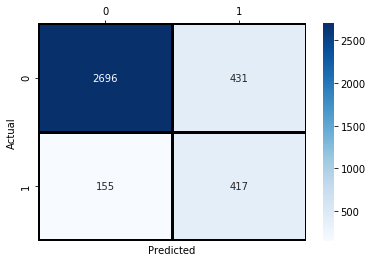

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3127
           1       0.49      0.73      0.59       572

    accuracy                           0.84      3699
   macro avg       0.72      0.80      0.74      3699
weighted avg       0.88      0.84      0.85      3699

*******************************************************************************************
PRECISION RECALL CURVE


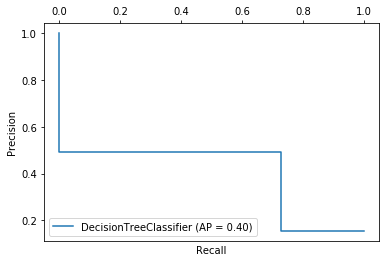

CROSS VALIDATION METRICS
Mean Accuracy : 0.9134840931881932
Standard Deviation : 0.021386755960221854
Mean precision score : 0.8578492777728931
Standard Deviation precision score : 0.022951415648141963
Mean recall score : 0.861639093137255
Standard Deviation recall score : 0.0692121155427031
Mean f1 score : 0.8584221216653107
Standard Deviation f1 score : 0.03917280287215311
Mean AUC ROC Score : 0.8990576923041219
Standard Deviation AUC ROC Score : 0.03402159550415514
*******************************************************************************************


In [63]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_Train_res,y_Train_res)
print(classifier_dt)

y_pred=classifier_dt.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_dt.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_dt.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_dt, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_dt, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# Decision Tree Hyper-parameter tuning

In [64]:
base_classifier = DecisionTreeClassifier()
params = [
    {
    'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123],
          'max_depth':[1,2,3,4,5,6]
        
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                   

# Decision Tree Hyper-parameter tuned model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
Training Accuracy : 0.7937100855524762
Testing Accuracy : 0.8113003514463368
ROC AUC Score : 0.6612668591402202
*******************************************************************************************
CONFUSION MATRIX


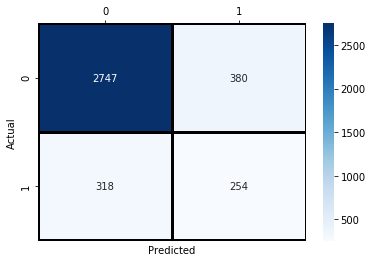

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3127
           1       0.40      0.44      0.42       572

    accuracy                           0.81      3699
   macro avg       0.65      0.66      0.65      3699
weighted avg       0.82      0.81      0.82      3699

*******************************************************************************************
PRECISION RECALL CURVE


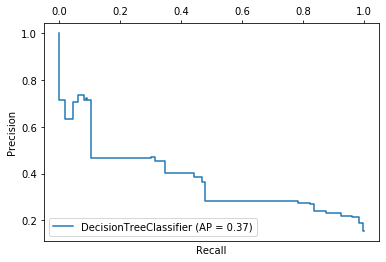

CROSS VALIDATION METRICS
Mean Accuracy : 0.7916627668696499
Standard Deviation : 0.013661773524882811
Mean precision score : 0.7036840945848555
Standard Deviation precision score : 0.03466670737921424
Mean recall score : 0.5682751225490196
Standard Deviation recall score : 0.09806565207295394
Mean f1 score : 0.6221136544039079
Standard Deviation f1 score : 0.05272024800208935
Mean AUC ROC Score : 0.7295779490945371
Standard Deviation AUC ROC Score : 0.035008044417514345
*******************************************************************************************


In [65]:
classifier_dt = DecisionTreeClassifier(criterion='gini', max_depth=6,
                                       max_features='auto', min_samples_leaf=1, min_samples_split=14, random_state=123)
classifier_dt.fit(X_Train_res,y_Train_res)
print(classifier_dt)

y_pred=classifier_dt.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_dt.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_dt.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_dt, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_dt, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# RANDOM FOREST

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Accuracy : 1.0
Testing Accuracy : 0.8718572587185726
ROC AUC Score : 0.8256450137646172
*******************************************************************************************
CONFUSION MATRIX


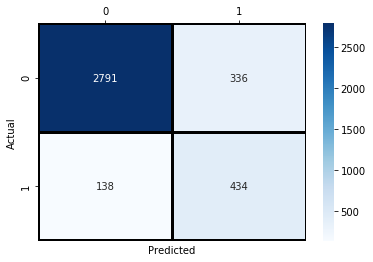

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.56      0.76      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


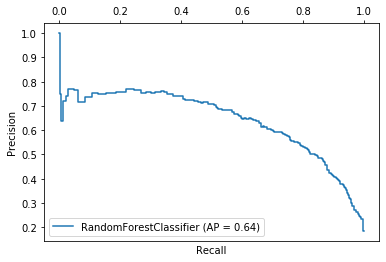

CROSS VALIDATION METRICS
Mean Accuracy : 0.9458995451044224
Standard Deviation : 0.022973093283147374
Mean precision score : 0.9246436566617243
Standard Deviation precision score : 0.01891332297515659
Mean recall score : 0.8968887867647058
Standard Deviation recall score : 0.07033545365289877
Mean f1 score : 0.9093642136897653
Standard Deviation f1 score : 0.0409133150741376
Mean AUC ROC Score : 0.9322591184240133
Standard Deviation AUC ROC Score : 0.03587351511594173
*******************************************************************************************


In [66]:
classifier_rf = RandomForestClassifier(n_estimators=200)
classifier_rf.fit(X_Train_res,y_Train_res)
print(classifier_rf)

y_pred=classifier_rf.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_rf.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_rf.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
labels = ['Non-revenue', 'Revenue']
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_rf, X_Test, y_Test)
plt.show()


# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_rf, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# RF Hyper-parameter tuning

In [67]:
## Hyper Parameter Tuning
print('Parameters currently in use:\n')
print(classifier_rf.get_params())
print("\n")

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)] ## play with start and stop

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20,num = 5)] ## change 10,20 and 2
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = classifier_rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_Train_res, y_Train_res)
print("*******************************************************************************************")
print("Best Hyper Parameters:",rf_random.best_params_)
print("Best Accuracy Score:",rf_random.best_score_)
print("Best Estimators:",rf_random.best_estimator_)
print("*******************************************************************************************")

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


*******************************************************************************************
Best Hyper Parameters: {'n_estimators': 175, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 17, 'bootstrap': False}
Best Accuracy Score: 0.940598154244107
Best Estimators: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*******************************************************************************************


# RF Hyper-parameter tuned model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Accuracy : 0.9966260995300639
Testing Accuracy : 0.8740200054068668
ROC AUC Score : 0.8290668797144652
*******************************************************************************************
CONFUSION MATRIX


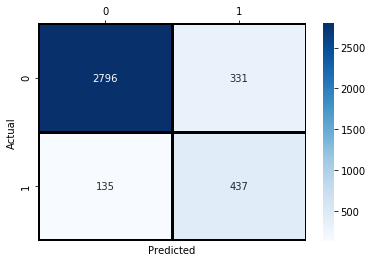

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.57      0.76      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


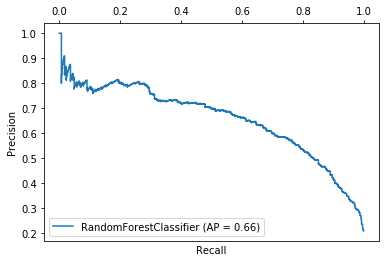

CROSS VALIDATION METRICS
Mean Accuracy : 0.9457789178426614
Standard Deviation : 0.02182313764511166
Mean precision score : 0.9243954855697762
Standard Deviation precision score : 0.02014709195215445
Mean recall score : 0.8968949142156862
Standard Deviation recall score : 0.06610165639362582
Mean f1 score : 0.9093632452005845
Standard Deviation f1 score : 0.03873835084220197
Mean AUC ROC Score : 0.9321750741355663
Standard Deviation AUC ROC Score : 0.03379610780093193
*******************************************************************************************


In [68]:
classifier_rf = RandomForestClassifier(n_estimators=175,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=
                                       17,bootstrap=False)
classifier_rf.fit(X_Train_res,y_Train_res)
print(classifier_rf)

y_pred=classifier_rf.predict(X_Test)

# evaluating the model
print("Training Accuracy :", classifier_rf.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_rf.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
fig = plt.figure()
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_rf, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_rf, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# XGBOOST

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training Accuracy : 0.9398722737679238
Testing Accuracy : 0.874831035414977
ROC AUC Score : 0.824546975250525
*******************************************************************************************
CONFUSION MATRIX


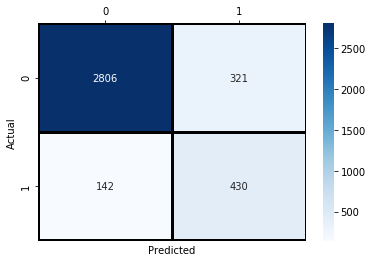

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.75      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.79      3699
weighted avg       0.89      0.87      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


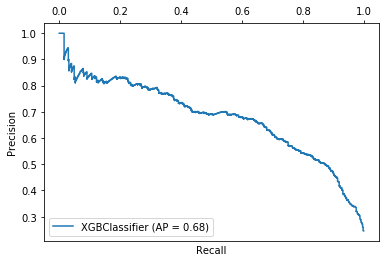

CROSS VALIDATION METRICS
Mean Accuracy : 0.9321627160027323
Standard Deviation : 0.021290178727092494
Mean precision score : 0.9205045508262
Standard Deviation precision score : 0.019697597603000244
Mean recall score : 0.8526424632352942
Standard Deviation recall score : 0.06188902647207748
Mean f1 score : 0.8843879472607379
Standard Deviation f1 score : 0.03925768893300312
Mean AUC ROC Score : 0.9100496061063609
Standard Deviation AUC ROC Score : 0.03237220916897917
*******************************************************************************************


In [72]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_Train_res,y_Train_res)
print(classifier_xgb)

y_pred=classifier_xgb.predict(X_Test.values)

# evaluating the model
print("Training Accuracy :", classifier_xgb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_xgb.score(X_Test.values, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_xgb, X_Test.values, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_xgb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# XGBOOST Hyper-parameter tuning

In [73]:
base_classifier = XGBClassifier()
params = [
    {
   'n_estimators': [100,150,200],
          'learning_rate': [1,0.1,0.01,0.015,0.025,0.05],
        'n_jobs':[-1]
        
    }
]

best_classifier = GridSearchCV(base_classifier, param_grid=params, n_jobs=-1,cv=10)

#Learning
best_classifier.fit(X_Train_res,y_Train_res)
print(best_classifier)
#The best hyper parameters set
print("*******************************************************************************************")
print("Best Hyper Parameters:",best_classifier.best_params_)
print("Best Accuracy Score:",best_classifier.best_score_)
print("Best Estimators:",best_classifier.best_estimator_)
print("*******************************************************************************************")

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [1, 0.1, 0.01, 0.015, 0.025, 0.05],
                          'n_estimators': [100, 150, 200], 'n_jobs': [-1]}],
             pre_dispa

# XGBOOST Hyper-parameter tuned model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training Accuracy : 0.9507169538498614
Testing Accuracy : 0.8751013787510138
ROC AUC Score : 0.8232784164987555
*******************************************************************************************
CONFUSION MATRIX


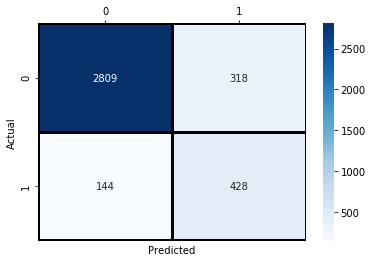

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.75      0.65       572

    accuracy                           0.88      3699
   macro avg       0.76      0.82      0.79      3699
weighted avg       0.89      0.88      0.88      3699

*******************************************************************************************
PRECISION RECALL CURVE


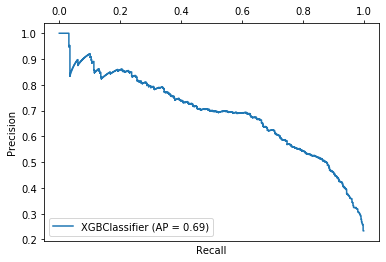

CROSS VALIDATION METRICS
Mean Accuracy : 0.9361392009533913
Standard Deviation : 0.023432336706950895
Mean precision score : 0.9223367967239311
Standard Deviation precision score : 0.020356141346406367
Mean recall score : 0.8651577818627452
Standard Deviation recall score : 0.07517636773543315
Mean f1 score : 0.8912494391510613
Standard Deviation f1 score : 0.04348419086508033
Mean AUC ROC Score : 0.9163931614964383
Standard Deviation AUC ROC Score : 0.037504555687855004
*******************************************************************************************


In [74]:
classifier_xgb = XGBClassifier(learning_rate=0.1, n_estimators=200, n_jobs=-1)
classifier_xgb.fit(X_Train_res,y_Train_res)
print(classifier_xgb)

y_pred=classifier_xgb.predict(X_Test.values)

# evaluating the model
print("Training Accuracy :", classifier_xgb.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", classifier_xgb.score(X_Test.values, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(classifier_xgb, X_Test.values, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = classifier_xgb, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# VOTING CLASSIFIER

<bound method VotingClassifier.fit of VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=14,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                     

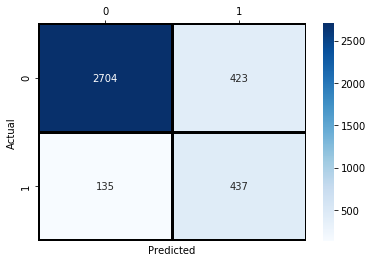

*******************************************************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      3127
           1       0.51      0.76      0.61       572

    accuracy                           0.85      3699
   macro avg       0.73      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699

*******************************************************************************************
PRECISION RECALL CURVE


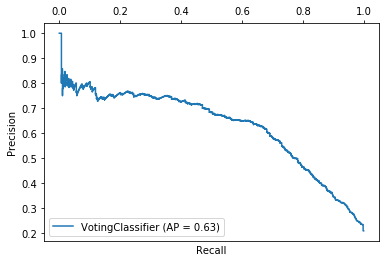

CROSS VALIDATION METRICS
Mean Accuracy : 0.9505976136148938
Standard Deviation : 0.01398506406373488
Mean precision score : 0.9347851966121417
Standard Deviation precision score : 0.015202812165616992
Mean recall score : 0.9024157475490195
Standard Deviation recall score : 0.04282359719457717
Mean f1 score : 0.9178045312098242
Standard Deviation f1 score : 0.02490338048854583
Mean AUC ROC Score : 0.9371977237972337
Standard Deviation AUC ROC Score : 0.02168624213973031
*******************************************************************************************


In [80]:
lr_vc = LogisticRegression(C=1,solver='newton-cg')
svm_vc=SVC(C=100,gamma=1,kernel='rbf',probability=True)
knn_vc=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')
nb_vc=GaussianNB()
dt_vc=DecisionTreeClassifier(criterion='gini', max_depth=6,
                                       max_features='auto', min_samples_leaf=1, min_samples_split=14, random_state=123)
rf_vc=RandomForestClassifier(n_estimators=175,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=
                                       17,bootstrap=False)

evc = VotingClassifier(estimators= [('dt',dt_vc),('svm',svm_vc),('knn',knn_vc),('nb',nb_vc),('rf',rf_vc),('lr',lr_vc)], 
                       voting = 'soft')
evc.fit(X_Train_res,y_Train_res)
print(evc.fit)


y_pred=evc.predict(X_Test)

# evaluating the model
print("Training Accuracy :", evc.score(X_Train_res, y_Train_res))
print("Testing Accuracy :", evc.score(X_Test, y_Test))
print("ROC AUC Score :", roc_auc_score(y_Test, y_pred))
print("*******************************************************************************************")

print("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_Test,y_pred), annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("*******************************************************************************************")
print("CLASSIFICATION REPORT")
print(classification_report(y_Test,y_pred))
print("*******************************************************************************************")
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(evc, X_Test, y_Test)
plt.show()

# cross validation
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = evc, X = X_Train_res, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# STACKING

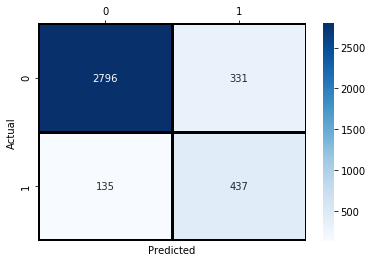

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.57      0.76      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.87      0.88      3699

PRECISION RECALL CURVE


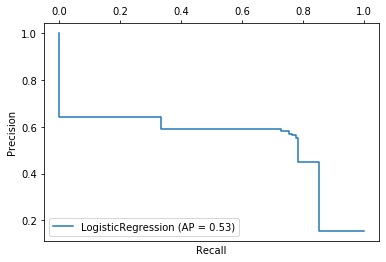

CROSS VALIDATION METRICS
Mean Accuracy : 0.9966263606900461
Standard Deviation : 0.0028914572953403135
Mean precision score : 0.998818848815773
Standard Deviation precision score : 0.0018042915069111608
Mean recall score : 0.9901960784313726
Standard Deviation recall score : 0.009485009115645369
Mean f1 score : 0.994463968848945
Standard Deviation f1 score : 0.00475736768685506
Mean AUC ROC Score : 0.9948370181582706
Standard Deviation AUC ROC Score : 0.004705032424319637
*******************************************************************************************


In [82]:
## Algorithm 1: xgboost
pred_val_xgb=classifier_xgb.predict(X_Train_res)
test_pred_xgb=classifier_xgb.predict(X_Test.values)

## Algorithm 2: Random Forest
pred_val_rf=classifier_rf.predict(X_Train_res)
test_pred_rf=classifier_rf.predict(X_Test)

## Algorithm 3: Decision Tree
pred_val_dt=classifier_dt.predict(X_Train_res)
test_pred_dt=classifier_dt.predict(X_Test)

stacked_predictions=np.column_stack((pred_val_rf,pred_val_xgb,pred_val_dt)) ## Prediction by the algorithms on training data
#stacked_predictions[0:10]
stacked_test_predictions=np.column_stack((test_pred_rf,test_pred_xgb,test_pred_dt)) ## Prediction by the algorithms on testing data
#stacked_test_predictions[0:10]

## Building Meta Model
lr_stack = LogisticRegression()
lr_stack.fit(stacked_predictions,y_Train_res) ## stacked_predictions=X_train

y_pred_stack=lr_stack.predict(stacked_test_predictions) ## stacked_test_predictions=X_test
y_pred_stack


# evaluating the model
cm = confusion_matrix(y_Test, y_pred_stack)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_Test, y_pred_stack))
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(lr_stack, stacked_test_predictions, y_Test)
plt.show()

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = lr_stack, X = stacked_predictions, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")

# BLENDING

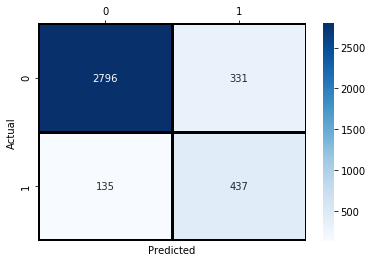

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.57      0.76      0.65       572

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.87      0.88      3699

PRECISION RECALL CURVE


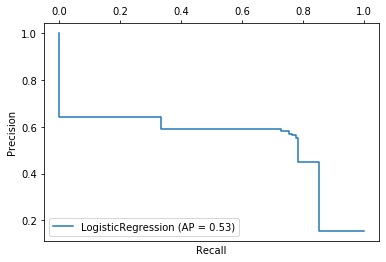

CROSS VALIDATION METRICS
Mean Accuracy : 0.9966263606900461
Standard Deviation : 0.0028914572953403135
Mean precision score : 0.998818848815773
Standard Deviation precision score : 0.0018042915069111608
Mean recall score : 0.9901960784313726
Standard Deviation recall score : 0.009485009115645369
Mean f1 score : 0.994463968848945
Standard Deviation f1 score : 0.00475736768685506
Mean AUC ROC Score : 0.9948370181582706
Standard Deviation AUC ROC Score : 0.004705032424319637
*******************************************************************************************


In [83]:
## Algorithm 1: xgboost
pred_val_xgb=classifier_xgb.predict(X_Train_res)
test_pred_xgb=classifier_xgb.predict(X_Test.values)

## Algorithm 2: Random Forest
pred_val_rf=classifier_rf.predict(X_Train_res)
test_pred_rf=classifier_rf.predict(X_Test)

## Algorithm 3: Decision Tree
pred_val_dt=classifier_dt.predict(X_Train_res)
test_pred_dt=classifier_dt.predict(X_Test)

stacked_predictions=np.column_stack((pred_val_rf,pred_val_xgb,pred_val_dt)) ## Prediction by the algorithms on training data
#stacked_predictions[0:10]
stacked_test_predictions=np.column_stack((test_pred_rf,test_pred_xgb,test_pred_dt)) ## Prediction by the algorithms on testing data
#stacked_test_predictions[0:10]

stacked_predictions=pd.DataFrame(stacked_predictions)
stacked_test_predictions=pd.DataFrame(stacked_test_predictions)


## Building Meta Model
lr_stack = LogisticRegression()
lr_stack.fit(stacked_predictions,y_Train_res) ## stacked_predictions=X_train

y_pred_stack=lr_stack.predict(stacked_test_predictions) ## stacked_test_predictions=X_test
y_pred_stack


# evaluating the model
cm = confusion_matrix(y_Test, y_pred_stack)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g',linewidths=2, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_Test, y_pred_stack))
print("PRECISION RECALL CURVE")
pre_recall_curve = plot_precision_recall_curve(lr_stack, stacked_test_predictions, y_Test)
plt.show()

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'AUC ROC score' : make_scorer(roc_auc_score)}
cvs = cross_validate(estimator = lr_stack, X = stacked_predictions, y = y_Train_res, cv = 10,scoring=scoring)
#print(cvs)
print("CROSS VALIDATION METRICS")
print("Mean Accuracy :", np.mean(cvs['test_accuracy']))
print("Standard Deviation :", np.std(cvs['test_accuracy']))
print("Mean precision score :", np.mean(cvs['test_precision']))
print("Standard Deviation precision score :", np.std(cvs['test_precision']))
print("Mean recall score :", np.mean(cvs['test_recall']))
print("Standard Deviation recall score :", np.std(cvs['test_recall']))
print("Mean f1 score :", np.mean(cvs['test_f1_score']))
print("Standard Deviation f1 score :", np.std(cvs['test_f1_score']))
print("Mean AUC ROC Score :", np.mean(cvs['test_AUC ROC score']))
print("Standard Deviation AUC ROC Score :", np.std(cvs['test_AUC ROC score']))
print("*******************************************************************************************")